# ДЗ №1

In [6]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

iris_data = pd.read_csv("Iris.csv")
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], 
                             [0, 1, 2], inplace=True)

columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


def train(X_train, y_train, n=0.1, eta=100000):
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    errors = []
    for i in range(eta):
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

    print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

#### Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.

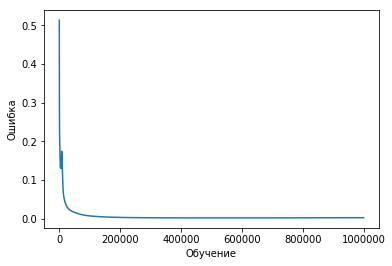

Точность нейронной сети 99.7%


In [9]:
train(X_train, y_train, n=0.01, eta=1000000)

#### Проведите анализ 

* что приводит к увеличению ее точности?

> для увеличения точности нужно уменьшать скорость обучения n но при этом чаще всего потребуется увеличение количества итераций так например при 100к итераций но скорости обучения 0.01 точность будет уже 98% а если увеличить количество итераций до 1 млн то получим уже 99.7%

* что приводит к ухудшению точности нейронной сети?

> соответственно при уменьшение скорости обучения мы вообщем можем сильно ухудшить точность потому как мы можем "проскочить" наилучшие веса при таком граидентном спуске 

> тоже самое можно сказать про количество итераций - по сути мы можем просто "не дойти" до хороших весов, примеры ниже

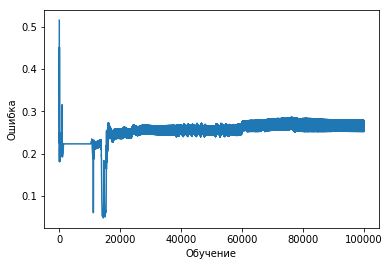

Точность нейронной сети 74.76%


In [14]:
train(X_train, y_train, n=0.3)

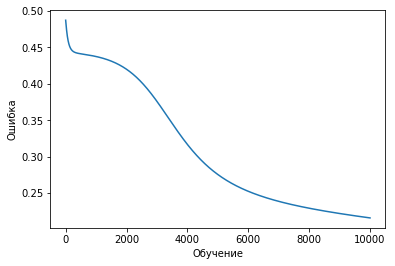

Точность нейронной сети 78.42%


In [13]:
train(X_train, y_train, n=0.001, eta=10000)